<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predictor-variable-rdm" data-toc-modified-id="Predictor-variable-rdm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictor variable rdm</a></span></li><li><span><a href="#Full-feature-model" data-toc-modified-id="Full-feature-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Full feature model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Dimensional-model" data-toc-modified-id="Dimensional-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dimensional model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Categorical-model" data-toc-modified-id="Categorical-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Categorical model</a></span><ul class="toc-item"><li><span><a href="#regression-coefficient" data-toc-modified-id="regression-coefficient-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>regression coefficient</a></span></li><li><span><a href="#permutation" data-toc-modified-id="permutation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>permutation</a></span></li></ul></li><li><span><a href="#Dimensional:-single-dimension" data-toc-modified-id="Dimensional:-single-dimension-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dimensional: single dimension</a></span><ul class="toc-item"><li><span><a href="#Formality" data-toc-modified-id="Formality-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Formality</a></span></li><li><span><a href="#Activeness" data-toc-modified-id="Activeness-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Activeness</a></span></li><li><span><a href="#Valence" data-toc-modified-id="Valence-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Valence</a></span></li><li><span><a href="#Exchange" data-toc-modified-id="Exchange-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Exchange</a></span></li><li><span><a href="#Equality" data-toc-modified-id="Equality-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Equality</a></span></li></ul></li><li><span><a href="#Categorical:-single-category" data-toc-modified-id="Categorical:-single-category-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Categorical: single category</a></span><ul class="toc-item"><li><span><a href="#Hostile" data-toc-modified-id="Hostile-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Hostile</a></span></li><li><span><a href="#Private" data-toc-modified-id="Private-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Private</a></span></li><li><span><a href="#Public" data-toc-modified-id="Public-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Public</a></span></li></ul></li><li><span><a href="#Plot-RSA-regression-results-in-Supplementary" data-toc-modified-id="Plot-RSA-regression-results-in-Supplementary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot RSA regression results in Supplementary</a></span><ul class="toc-item"><li><span><a href="#Dimensional" data-toc-modified-id="Dimensional-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Dimensional</a></span></li><li><span><a href="#Categorical" data-toc-modified-id="Categorical-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Categorical</a></span></li></ul></li></ul></div>

In [2]:
options(warn=-1)
library(openxlsx)
library(tidyverse)
library(reshape)

library(ggplot2)
library(RColorBrewer)
library(corrplot)
library(corrr)

In [2]:
regions_order = c(
    # English
    'USA','UK','Australia','South Africa',
    # Germany
    'Germany',
    # Japanese
    'Japan',
    # Hebrew
    'Israel',
    # Chinese
    'CHN','HK(region)',

    # French
    'France',
    # Spanish
    'Spain','Mexico','Chile',
    # Portuguese
    'Portugal','Brazil',
    # Russian
    'Russia',
    # Arabic
    'Egypt','Qatar',
    'India')

fix_region = function(df){
    regions = rownames(df)
    regions = str_replace(regions,'United States','USA')
    regions = str_replace(regions,'United Kingdom','UK')
    regions = str_replace(regions,'China','CHN')
    regions = str_replace(regions,'South_africa','South Africa')
    regions = str_replace(regions,'Spain','Spanish')
    regions = str_replace(regions,'HK','HK(region)')
    regions = gsub('Hong Kong SAR, CHN','HK(region)',regions,fixed=TRUE)
    regions = str_replace(regions,'Hong Kong','HK(region)')
    regions = str_replace(regions,'Spanish','Spain')
    regions = str_replace(regions,'Russian Federation','Russia')
    regions = str_replace(regions,'Russian','Russia')
    regions = str_replace(regions,'Egypt, Arab Rep.','Egypt')
    
    rownames(df) = regions
    colnames(df) = regions
    
    df = df[regions_order,regions_order]
    return(df)
}

lowerTriangle <- function(m){
  return(m[lower.tri(m,diag = FALSE)])
}

# Predictor variable rdm

In [3]:
# Language
Lexical = read.csv('../Cultural_RDM/rdm/Lexical_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Lexical = fix_region(Lexical)

# Personality
Agreeableness = read.csv('../Cultural_RDM/rdm/Agreeableness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Agreeableness = fix_region(Agreeableness)
Conscientiousness = read.csv('../Cultural_RDM/rdm/Conscientiousness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Conscientiousness = fix_region(Conscientiousness)
Extraversion = read.csv('../Cultural_RDM/rdm/Extraversion_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Extraversion = fix_region(Extraversion)
Neuroticism = read.csv('../Cultural_RDM/rdm/Neuroticism_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Neuroticism = fix_region(Neuroticism)
Openness = read.csv('../Cultural_RDM/rdm/Openness_dist.csv',row.names=1, encoding = "UTF-8",check.names = FALSE)
Openness = fix_region(Openness)
personality_all = read.csv('../Cultural_RDM/rdm/personality_all_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
personality_all = fix_region(personality_all)

# Socioecological
Climatic_demands = read.csv('../Cultural_RDM/rdm/Climatic_demands_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Climatic_demands = fix_region(Climatic_demands)
Coordinate = read.csv('../Cultural_RDM/rdm/Coordinate_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Coordinate = fix_region(Coordinate)
subsistence = read.csv('../Cultural_RDM/rdm/subsistence_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
subsistence = fix_region(subsistence)
disease = read.csv('../Cultural_RDM/rdm/disease_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
disease = fix_region(disease)

# Modernization
urban = read.csv('../Cultural_RDM/rdm/urban_rdm.csv', row.names=1, encoding = "UTF-8")
urban = fix_region(urban)
wealth = read.csv('../Cultural_RDM/rdm/wealth_rdm.csv', row.names=1, encoding = "UTF-8")
wealth = fix_region(wealth)
edu = read.csv('../Cultural_RDM/rdm/edu_rdm.csv', row.names=1, encoding = "UTF-8")
edu = fix_region(edu)
modern = read.csv('../Cultural_RDM/rdm/modern_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
modern = fix_region(modern)

# Cultural value
## Hofstede 6D
power = read.csv('../Cultural_RDM/rdm/power_rdm.csv', row.names=1, encoding = "UTF-8")
power = fix_region(power)
Individualism = read.csv('../Cultural_RDM/rdm/Individualism_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Individualism = fix_region(Individualism)
Masculine = read.csv('../Cultural_RDM/rdm/Masculine_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Masculine = fix_region(Masculine)
Uncertainty_Avoidance = read.csv('../Cultural_RDM/rdm/Uncertainty_Avoidance_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Uncertainty_Avoidance = fix_region(Uncertainty_Avoidance)
Long_Term_Orientation = read.csv('../Cultural_RDM/rdm/Long_Term_Orientation_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Long_Term_Orientation = fix_region(Long_Term_Orientation)
Indulgence = read.csv('../Cultural_RDM/rdm/Indulgence_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Indulgence = fix_region(Indulgence)
Hofstede_6D = read.csv('../Cultural_RDM/rdm/Hofstede_6D_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
Hofstede_6D = fix_region(Hofstede_6D)

# Gene
new_gendist_weighted = read.csv('../Cultural_RDM/rdm/new_gendist_weighted_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
new_gendist_weighted = fix_region(new_gendist_weighted)

# Religion
reldist_weighted_WCD_form = read.csv('../Cultural_RDM/rdm/reldist_weighted_WCD_form_dist.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
reldist_weighted_WCD_form = fix_region(reldist_weighted_WCD_form)
religion_per = read.csv('../Cultural_RDM/rdm/religion_percentage_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
religion_per = fix_region(religion_per)

# Political
idealogy = read.csv('../Cultural_RDM/rdm/political_idealogy_rdm_range.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
idealogy = fix_region(idealogy)

In [4]:
# Demographics
gender = read.csv('../DataCleanPCA/output_data/rdm/gender_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
gender = fix_region(gender)
age = read.csv('../DataCleanPCA/output_data/rdm/age_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
age = fix_region(age)
education_ind = read.csv('../DataCleanPCA/output_data/rdm/education_ind_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
education_ind = fix_region(education_ind)
demographics = read.csv('../DataCleanPCA/output_data/rdm/demographics_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
demographics = fix_region(demographics)

# check size
check_size = read.csv('../DataCleanPCA/output_data/rdm/check_size_rdm.csv', row.names=1, encoding = "UTF-8",check.names = FALSE)
check_size = fix_region(check_size)

In [5]:
# get rdms of predicators 
variables_names <- c('Lexical',# Language
                     'personality_all',# Personality
                     'Coordinate','Climatic_demands','subsistence','disease',# Socioecological
                     #'modern',# Modernization
                     'urban','wealth','edu',
                     'Hofstede_6D',# Cultural value
                     'new_gendist_weighted',# Gene
                     'religion_per',#'reldist_weighted_WCD_form',# Religion
                     'idealogy',# Political
                     'demographics',# Demographics
                     'check_size'
                    )

variables <- list()
for(i in c(1:length(variables_names))){
  variables[[i]] = get(variables_names[i])
}

In [6]:
permutation_result = function(culture_regress_standard_model){
    # create permutation matrix
    nperm <- 10000
    permf <- matrix(NA,nperm)
    permr2 <- matrix(NA,nperm)
    # contain beta_sub
    permt <- matrix(NA,nperm,length(variables_names)) # 12variables
    colnames(permt) <- variables_names
    # caculate proportation of beta_sub or F value over the model results
    permf_pvals <- NA 
    permt_pvals <- NA
    tstats = NA

    # the model results
    fstats <- culture_regress_standard_model$fstatistic[[1]]
    for (i in 1:length(variables_names)){
      tstats[i] <- culture_regress_standard_model$coefficients[1+i,1]
    }
    r2stats <- culture_regress_standard_model$r.squared
    print(paste('fstats:',fstats))
    #print('tstats:')
    #tstats
    print(paste('r2stats:',r2stats))

    set.seed(2)
    for (i in 1:nperm){
      psel <- sample(19) # permuted index, total 19 regions
      x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x[psel,psel]))) # generate permuted predictors
      rfit <- lm(scale(model_rdm_array)~scale(x)) # fit permuted model
      srfit <- summary(rfit)
      permf[i,1] <- srfit$fstatistic[1] # F-stat
      permr2[i,1] <- srfit$r.squared # R-squared
      #permf[,i] <- unlist(lapply(srfit,function(x) x$fstatistic[1])) # F-stat
      #permr2[,i] <- unlist(lapply(srfit,function(x) x$r.squared)) # R-squared
      for (j in 1:length(variables_names)){
        permt[i,j] <- srfit$coefficients[1+j,1] # each var t-stat
      }
      #print(i)
    }
    print(i)

    # F statistics
    permf_pvals <- mean(permf[,1] >= fstats)
    print(paste('permf_pvals',permf_pvals))

    # Each variable's regression
    for (i in 1:length(variables_names)){
      permt_pvals[i] <- mean(permt[,i] >= tstats[i])
    }

    permt_pvals <- as.data.frame(t(permt_pvals)) 

    colnames(permt_pvals) <- variables_names
    return(permt_pvals)
} 

# Full feature model

## regression coefficient

In [7]:
model_rdm = read.csv('output_data/models_rdm/full_feature/raw33d_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/raw_33d.csv')
full_feature_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71411 -0.37956  0.06011  0.36650  2.33695 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.278e-16  4.745e-02   0.000 1.000000    
scale(x)Lexical               3.586e-02  6.317e-02   0.568 0.571075    
scale(x)personality_all       1.431e-01  5.536e-02   2.586 0.010635 *  
scale(x)Coordinate           -1.156e-01  5.815e-02  -1.988 0.048543 *  
scale(x)Climatic_demands      1.939e-01  5.440e-02   3.565 0.000485 ***
scale(x)subsistence          -4.414e-02  5.564e-02  -0.793 0.428748    
scale(x)disease              -4.677e-03  5.569e-02  -0.084 0.933186    
scale(x)urban                 4.436e-01  5.894e-02   7.527 3.98e-12 ***
scale(x)wealth               -5.137e-02  5.885e-02  -0.873 0.384111    
scale(x)edu                   1.234e-01  5.337e-02   2.312 0.022122 *  
scale(x)Hofstede_6D          -8.63

## permutation

In [8]:
p_value_sub = permutation_result(full_feature_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/raw_33d.csv')

[1] "fstats: 19.1080593352854"
[1] "r2stats: 0.649020226398885"
[1] 10000
[1] "permf_pvals 4e-04"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3974,0.1969,0.768,0.1604,0.6135,0.5165,0.016,0.6333,0.203,0.6961,0.6823,0.0079,0.6953,0.3956,0.4325


# Dimensional model

## regression coefficient

In [9]:
model_rdm = read.csv('output_data/models_rdm/dimensional/favee_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/favee_33d.csv')
dimensional_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.20785 -0.39399  0.03409  0.42272  1.85752 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.272e-16  5.085e-02   0.000 1.000000    
scale(x)Lexical               3.810e-03  6.770e-02   0.056 0.955199    
scale(x)personality_all       1.855e-01  5.933e-02   3.127 0.002110 ** 
scale(x)Coordinate           -1.266e-01  6.232e-02  -2.032 0.043870 *  
scale(x)Climatic_demands      1.937e-01  5.830e-02   3.322 0.001115 ** 
scale(x)subsistence          -4.569e-03  5.963e-02  -0.077 0.939027    
scale(x)disease              -3.267e-02  5.969e-02  -0.547 0.584900    
scale(x)urban                 3.321e-01  6.317e-02   5.258 4.76e-07 ***
scale(x)wealth               -8.487e-02  6.307e-02  -1.346 0.180417    
scale(x)edu                   1.226e-01  5.720e-02   2.143 0.033656 *  
scale(x)Hofstede_6D          -1.32

## permutation

In [10]:
p_value_sub = permutation_result(dimensional_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/favee_33d.csv')

[1] "fstats: 15.2972665129702"
[1] "r2stats: 0.596836071129892"
[1] 10000
[1] "permf_pvals 0.0012"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.49,0.1766,0.7917,0.1787,0.4998,0.6437,0.0436,0.7329,0.2064,0.7792,0.847,0.0077,0.7357,0.3321,0.3685


# Categorical model

## regression coefficient

In [11]:
model_rdm = read.csv('output_data/models_rdm/categorical/hpp_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/hpp_33d.csv')
categorical_regression = culture_regress_standard_model


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07219 -0.60776  0.05636  0.53470  2.44959 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   3.109e-16  6.485e-02   0.000 1.000000    
scale(x)Lexical               8.977e-02  8.634e-02   1.040 0.300076    
scale(x)personality_all       4.424e-02  7.566e-02   0.585 0.559586    
scale(x)Coordinate           -1.486e-01  7.947e-02  -1.870 0.063393 .  
scale(x)Climatic_demands      1.691e-01  7.435e-02   2.275 0.024307 *  
scale(x)subsistence           2.487e-02  7.604e-02   0.327 0.744117    
scale(x)disease              -2.868e-02  7.612e-02  -0.377 0.706805    
scale(x)urban                 3.026e-01  8.055e-02   3.756 0.000244 ***
scale(x)wealth                1.345e-01  8.043e-02   1.672 0.096604 .  
scale(x)edu                   3.197e-02  7.295e-02   0.438 0.661811    
scale(x)Hofstede_6D          -8.75

## permutation

In [12]:
p_value_sub = permutation_result(categorical_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/hpp_33d.csv')

[1] "fstats: 5.42734518840601"
[1] "r2stats: 0.344359868829242"
[1] 10000
[1] "permf_pvals 0.0863"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2361,0.3395,0.8658,0.1309,0.4069,0.6193,0.0422,0.1372,0.3656,0.717,0.5374,0.0196,0.6428,0.9859,0.7227


# Dimensional: single dimension

## Formality

In [13]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/formality_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/formality_33d.csv')
formality_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(formality_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/formality_33d.csv')


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7808 -0.4884  0.0553  0.4620  2.5535 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -1.661e-16  5.933e-02   0.000  1.00000    
scale(x)Lexical               4.241e-02  7.899e-02   0.537  0.59211    
scale(x)personality_all       4.063e-02  6.922e-02   0.587  0.55808    
scale(x)Coordinate           -1.960e-01  7.271e-02  -2.696  0.00779 ** 
scale(x)Climatic_demands      1.131e-01  6.802e-02   1.663  0.09842 .  
scale(x)subsistence          -6.169e-02  6.957e-02  -0.887  0.37662    
scale(x)disease              -1.104e-01  6.964e-02  -1.586  0.11483    
scale(x)urban                 1.256e-01  7.370e-02   1.704  0.09034 .  
scale(x)wealth               -1.865e-01  7.359e-02  -2.535  0.01223 *  
scale(x)edu                   1.502e-01  6.674e-02   2.251  0.02581 *  
scale(x)Hofstede_6D          -6.646e-02  7.6

[1] "fstats: 8.49629151731358"
[1] "r2stats: 0.451219372913937"
[1] 10000
[1] "permf_pvals 0.0163"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3793,0.383,0.9204,0.2518,0.6774,0.9006,0.2257,0.9489,0.1448,0.6552,0.7645,0.0029,0.6816,0.5632,0.0883


## Activeness

In [14]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/activeness_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/activeness_33d.csv')
activeness_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(activeness_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/activeness_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.48112 -0.47197  0.05449  0.54476  2.10426 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   6.782e-16  6.452e-02   0.000   1.0000    
scale(x)Lexical               1.523e-01  8.591e-02   1.772   0.0783 .  
scale(x)personality_all       1.033e-01  7.528e-02   1.372   0.1720    
scale(x)Coordinate           -9.372e-02  7.908e-02  -1.185   0.2377    
scale(x)Climatic_demands      8.753e-02  7.398e-02   1.183   0.2385    
scale(x)subsistence          -1.588e-02  7.566e-02  -0.210   0.8340    
scale(x)disease              -7.670e-02  7.574e-02  -1.013   0.3128    
scale(x)urban                 3.267e-01  8.015e-02   4.077 7.28e-05 ***
scale(x)wealth               -1.016e-01  8.003e-02  -1.269   0.2063    
scale(x)edu                   1.430e-01  7.258e-02   1.970   0.0506 .  
scale(x)Hofstede_6D          -7.70

[1] "fstats: 5.58580987310032"
[1] "r2stats: 0.350886338584029"
[1] 10000
[1] "permf_pvals 0.0477"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1271,0.2644,0.7492,0.2933,0.5307,0.8111,0.0248,0.7922,0.1345,0.6954,0.5389,0.0503,0.787,0.4214,0.562


## Valence

In [15]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/valence_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/valence_33d.csv')
valence_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(valence_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/valence_33d.csv')                          


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.80856 -0.56380 -0.04253  0.51885  2.12874 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   2.866e-16  6.409e-02   0.000 1.000000    
scale(x)Lexical              -5.548e-02  8.533e-02  -0.650 0.516561    
scale(x)personality_all       1.116e-01  7.478e-02   1.493 0.137472    
scale(x)Coordinate           -6.368e-02  7.855e-02  -0.811 0.418799    
scale(x)Climatic_demands      2.047e-01  7.348e-02   2.785 0.006017 ** 
scale(x)subsistence          -1.797e-01  7.516e-02  -2.392 0.017978 *  
scale(x)disease              -9.843e-02  7.523e-02  -1.308 0.192689    
scale(x)urban                 3.025e-01  7.961e-02   3.799 0.000208 ***
scale(x)wealth               -5.598e-02  7.950e-02  -0.704 0.482345    
scale(x)edu                   1.585e-01  7.210e-02   2.198 0.029422 *  
scale(x)Hofstede_6D          -1.49

[1] "fstats: 5.80144767494239"
[1] "r2stats: 0.359561599997345"
[1] 10000
[1] "permf_pvals 0.22"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6552,0.2576,0.6437,0.1572,0.9088,0.8814,0.0534,0.6442,0.1435,0.8216,0.3257,0.1014,0.6822,0.1888,0.5507


## Exchange

In [16]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/exchange_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/exchange_33d.csv')
exchange_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(exchange_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/exchange_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09004 -0.59545 -0.06066  0.57605  2.10649 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   4.815e-16  6.960e-02   0.000 1.000000    
scale(x)Lexical               5.133e-02  9.266e-02   0.554 0.580410    
scale(x)personality_all      -7.627e-02  8.120e-02  -0.939 0.349032    
scale(x)Coordinate           -4.903e-02  8.529e-02  -0.575 0.566250    
scale(x)Climatic_demands      1.989e-02  7.979e-02   0.249 0.803507    
scale(x)subsistence           6.305e-02  8.161e-02   0.773 0.440925    
scale(x)disease              -4.558e-03  8.169e-02  -0.056 0.955579    
scale(x)urban                 2.978e-01  8.645e-02   3.445 0.000736 ***
scale(x)wealth               -3.702e-02  8.632e-02  -0.429 0.668611    
scale(x)edu                   1.407e-01  7.829e-02   1.797 0.074268 .  
scale(x)Hofstede_6D          -7.09

[1] "fstats: 3.35041127331621"
[1] "r2stats: 0.244846083409661"
[1] 10000
[1] "permf_pvals 0.6225"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3536,0.6247,0.6073,0.3821,0.3111,0.5076,0.0519,0.5904,0.1643,0.5174,0.8285,0.1625,0.9447,0.3955,0.6915


## Equality

In [17]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/dimensional/equality_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/equality_33d.csv')
equality_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(equality_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/equality_33d.csv')                          


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34427 -0.49894  0.06573  0.49834  1.31461 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.750e-16  5.431e-02   0.000 1.000000    
scale(x)Lexical              -9.591e-02  7.231e-02  -1.326 0.186702    
scale(x)personality_all       2.967e-01  6.337e-02   4.683 6.14e-06 ***
scale(x)Coordinate           -1.433e-01  6.656e-02  -2.153 0.032853 *  
scale(x)Climatic_demands      8.970e-02  6.227e-02   1.440 0.151772    
scale(x)subsistence          -9.953e-03  6.369e-02  -0.156 0.876019    
scale(x)disease              -4.771e-03  6.375e-02  -0.075 0.940439    
scale(x)urban                 2.452e-01  6.747e-02   3.635 0.000378 ***
scale(x)wealth               -7.718e-02  6.737e-02  -1.146 0.253681    
scale(x)edu                   1.302e-01  6.110e-02   2.131 0.034701 *  
scale(x)Hofstede_6D          -1.03

[1] "fstats: 12.1341047661705"
[1] "r2stats: 0.540075139516617"
[1] 10000
[1] "permf_pvals 0.0034"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7574,0.0552,0.836,0.2911,0.5063,0.5103,0.0825,0.7169,0.1744,0.7328,0.8301,0.0069,0.763,0.2105,0.2319


# Categorical: single category

## Hostile

In [18]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/hostile_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/hostile_33d.csv')
hostile_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(hostile_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/hostile_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06694 -0.61496 -0.00139  0.67040  1.75161 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  -1.203e-17  7.160e-02   0.000  1.00000   
scale(x)Lexical               2.618e-01  9.532e-02   2.746  0.00674 **
scale(x)personality_all      -6.711e-03  8.353e-02  -0.080  0.93607   
scale(x)Coordinate           -7.243e-02  8.774e-02  -0.825  0.41038   
scale(x)Climatic_demands      4.920e-02  8.209e-02   0.599  0.54983   
scale(x)subsistence           2.393e-01  8.396e-02   2.851  0.00496 **
scale(x)disease               8.157e-02  8.404e-02   0.971  0.33325   
scale(x)urban                 1.333e-01  8.893e-02   1.499  0.13581   
scale(x)wealth                8.776e-02  8.880e-02   0.988  0.32458   
scale(x)edu                   4.696e-02  8.054e-02   0.583  0.56071   
scale(x)Hofstede_6D          -1.444e-02  9.26

[1] "fstats: 2.59620063733778"
[1] "r2stats: 0.200796149592623"
[1] 10000
[1] "permf_pvals 0.0682"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.0129,0.4951,0.7436,0.3045,0.0218,0.1577,0.122,0.1732,0.2947,0.5395,0.8976,0.2691,0.3219,0.9466,0.9757


## Private

In [19]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/private_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/private_33d.csv')
private_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(private_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/private_33d.csv')                           


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33200 -0.55783 -0.04098  0.64764  2.58412 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -2.317e-16  6.963e-02   0.000 1.000000    
scale(x)Lexical               1.107e-01  9.271e-02   1.194 0.234304    
scale(x)personality_all      -1.716e-02  8.124e-02  -0.211 0.833005    
scale(x)Coordinate           -1.173e-01  8.534e-02  -1.374 0.171369    
scale(x)Climatic_demands      1.365e-01  7.984e-02   1.709 0.089408 .  
scale(x)subsistence          -8.189e-02  8.165e-02  -1.003 0.317464    
scale(x)disease              -7.709e-02  8.173e-02  -0.943 0.347036    
scale(x)urban                 2.355e-01  8.649e-02   2.722 0.007226 ** 
scale(x)wealth                1.874e-01  8.637e-02   2.169 0.031576 *  
scale(x)edu                  -2.959e-02  7.833e-02  -0.378 0.706092    
scale(x)Hofstede_6D          -9.59

[1] "fstats: 3.33591660342363"
[1] "r2stats: 0.244045329396843"
[1] 10000
[1] "permf_pvals 0.2083"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1805,0.5072,0.8131,0.1719,0.7484,0.8122,0.0628,0.0538,0.5595,0.7534,0.3789,0.0238,0.6678,0.9936,0.6719


## Public

In [20]:
# 1.regression coefficient
model_rdm = read.csv('output_data/models_rdm/categorical/public_dissim_dist.csv',
                    row.names =1, check.names = FALSE)
model_rdm = model_rdm[regions_order,regions_order]
model_rdm_array = lowerTriangle(model_rdm)

x <- do.call(cbind,lapply(variables,function(x) lowerTriangle(x))) # generate permuted predictors
colnames(x) = variables_names
culture_regress_standard <- lm(scale(model_rdm_array)~scale(x))
culture_regress_standard_model <- summary(culture_regress_standard)
culture_regress_standard_model

write.csv(culture_regress_standard_model$coefficients,
 file='output_data/beta_sub/check_size/public_33d.csv')
public_regression = culture_regress_standard_model

# 2.permutation
p_value_sub = permutation_result(public_regression)
p_value_sub
write.csv(p_value_sub,'output_data/p_value_sub/check_size/public_33d.csv')                         


Call:
lm(formula = scale(model_rdm_array) ~ scale(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75239 -0.50447 -0.04311  0.50854  2.44564 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.740e-16  6.107e-02   0.000 1.000000    
scale(x)Lexical               2.896e-02  8.130e-02   0.356 0.722154    
scale(x)personality_all       7.017e-02  7.124e-02   0.985 0.326217    
scale(x)Coordinate           -1.546e-01  7.484e-02  -2.066 0.040503 *  
scale(x)Climatic_demands      1.543e-01  7.001e-02   2.204 0.028982 *  
scale(x)subsistence           1.257e-02  7.161e-02   0.176 0.860840    
scale(x)disease              -2.865e-02  7.168e-02  -0.400 0.689877    
scale(x)urban                 3.682e-01  7.585e-02   4.854 2.92e-06 ***
scale(x)wealth                9.318e-02  7.574e-02   1.230 0.220465    
scale(x)edu                   5.039e-02  6.869e-02   0.734 0.464334    
scale(x)Hofstede_6D          -9.72

[1] "fstats: 7.44005217842181"
[1] "r2stats: 0.418606358000902"
[1] 10000
[1] "permf_pvals 0.0453"


Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4047,0.2837,0.8627,0.1524,0.4522,0.6264,0.0289,0.22,0.3167,0.7196,0.5418,0.0095,0.691,0.9701,0.6257


# Plot RSA regression results in Supplementary

In [3]:
files = dir('output_data/beta_sub/check_size/')
files = files[-which(files %in% c('favee_33d.csv','hpp_33d.csv','raw_33d.csv'))]
models = c()
regression_results = data.frame(matrix(ncol=13,nrow=7))
count = 1
for (file in files){
    model = strsplit(file,'_')[[1]][1]
    models = c(models,model)
    
    results_df = read.csv(paste('output_data/beta_sub/check_size/',file,sep = ''),row.names=1) 
    beta = results_df[2:14,1]
    regression_results[count,] = beta 
    count = count + 1
}
rownames(regression_results) = models
colnames(regression_results) = c('Language','Personality','Geography','Climates',
             'Subsistence','Disease','Urbanization','Wealth','Education',
             'Hofstede6D','Genetics','Religion','Politics')#'Demographics'
regression_results = data.frame(t(regression_results))

regression_results['Predictor'] = rownames(regression_results)
regression_results
regression_results_melt = melt(regression_results,id.vars = 'Predictor')
regression_results_melt$Predictor = factor(regression_results_melt$Predictor,
levels = c('Language','Personality','Geography','Climates',
             'Subsistence','Disease',
             'Hofstede6D','Genetics','Politics',#'Demographics',
             'Urbanization','Wealth','Education','Religion'))
colnames(regression_results_melt) = c('predictor','model','value')
regression_results_melt$'model' = factor(regression_results_melt$'model',
                            levels = c('formality','activeness','valence','exchange',
                                      'equality','hostile','private','public'))

,activeness,equality,exchange,formality,hostile,private,public,valence,Predictor
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Language,0.15226075,-0.095906512,0.051329146,0.04240986,0.261769486,0.11069404,0.02896259,-0.05547828,Language
Personality,0.10330174,0.296719017,-0.076268547,0.04062885,-0.006711291,-0.01715806,0.07016762,0.11163855,Personality
Geography,-0.09372326,-0.143319748,-0.049026753,-0.19604564,-0.072428186,-0.11726819,-0.15460751,-0.06367521,Geography
Climates,0.08753305,0.089697395,0.019887702,0.11309216,0.049198211,0.13646011,0.15432906,0.20466677,Climates
Subsistence,-0.01588348,-0.009953196,0.063053863,-0.06168833,0.239331713,-0.08189197,0.01257416,-0.17973836,Subsistence
Disease,-0.07670335,-0.004771096,-0.004557624,-0.11043001,0.081569818,-0.07709198,-0.02865444,-0.09842662,Disease
Urbanization,0.32674054,0.245222342,0.297775823,0.12559388,0.133344797,0.23546173,0.36822853,0.30246203,Urbanization
Wealth,-0.10157148,-0.077183325,-0.037021340,-0.18654941,0.087759245,0.18736710,0.09318287,-0.05598347,Wealth
Education,0.14299105,0.130171955,0.140689876,0.15020804,0.046958225,-0.02959320,0.05038917,0.15847848,Education


png 
  2

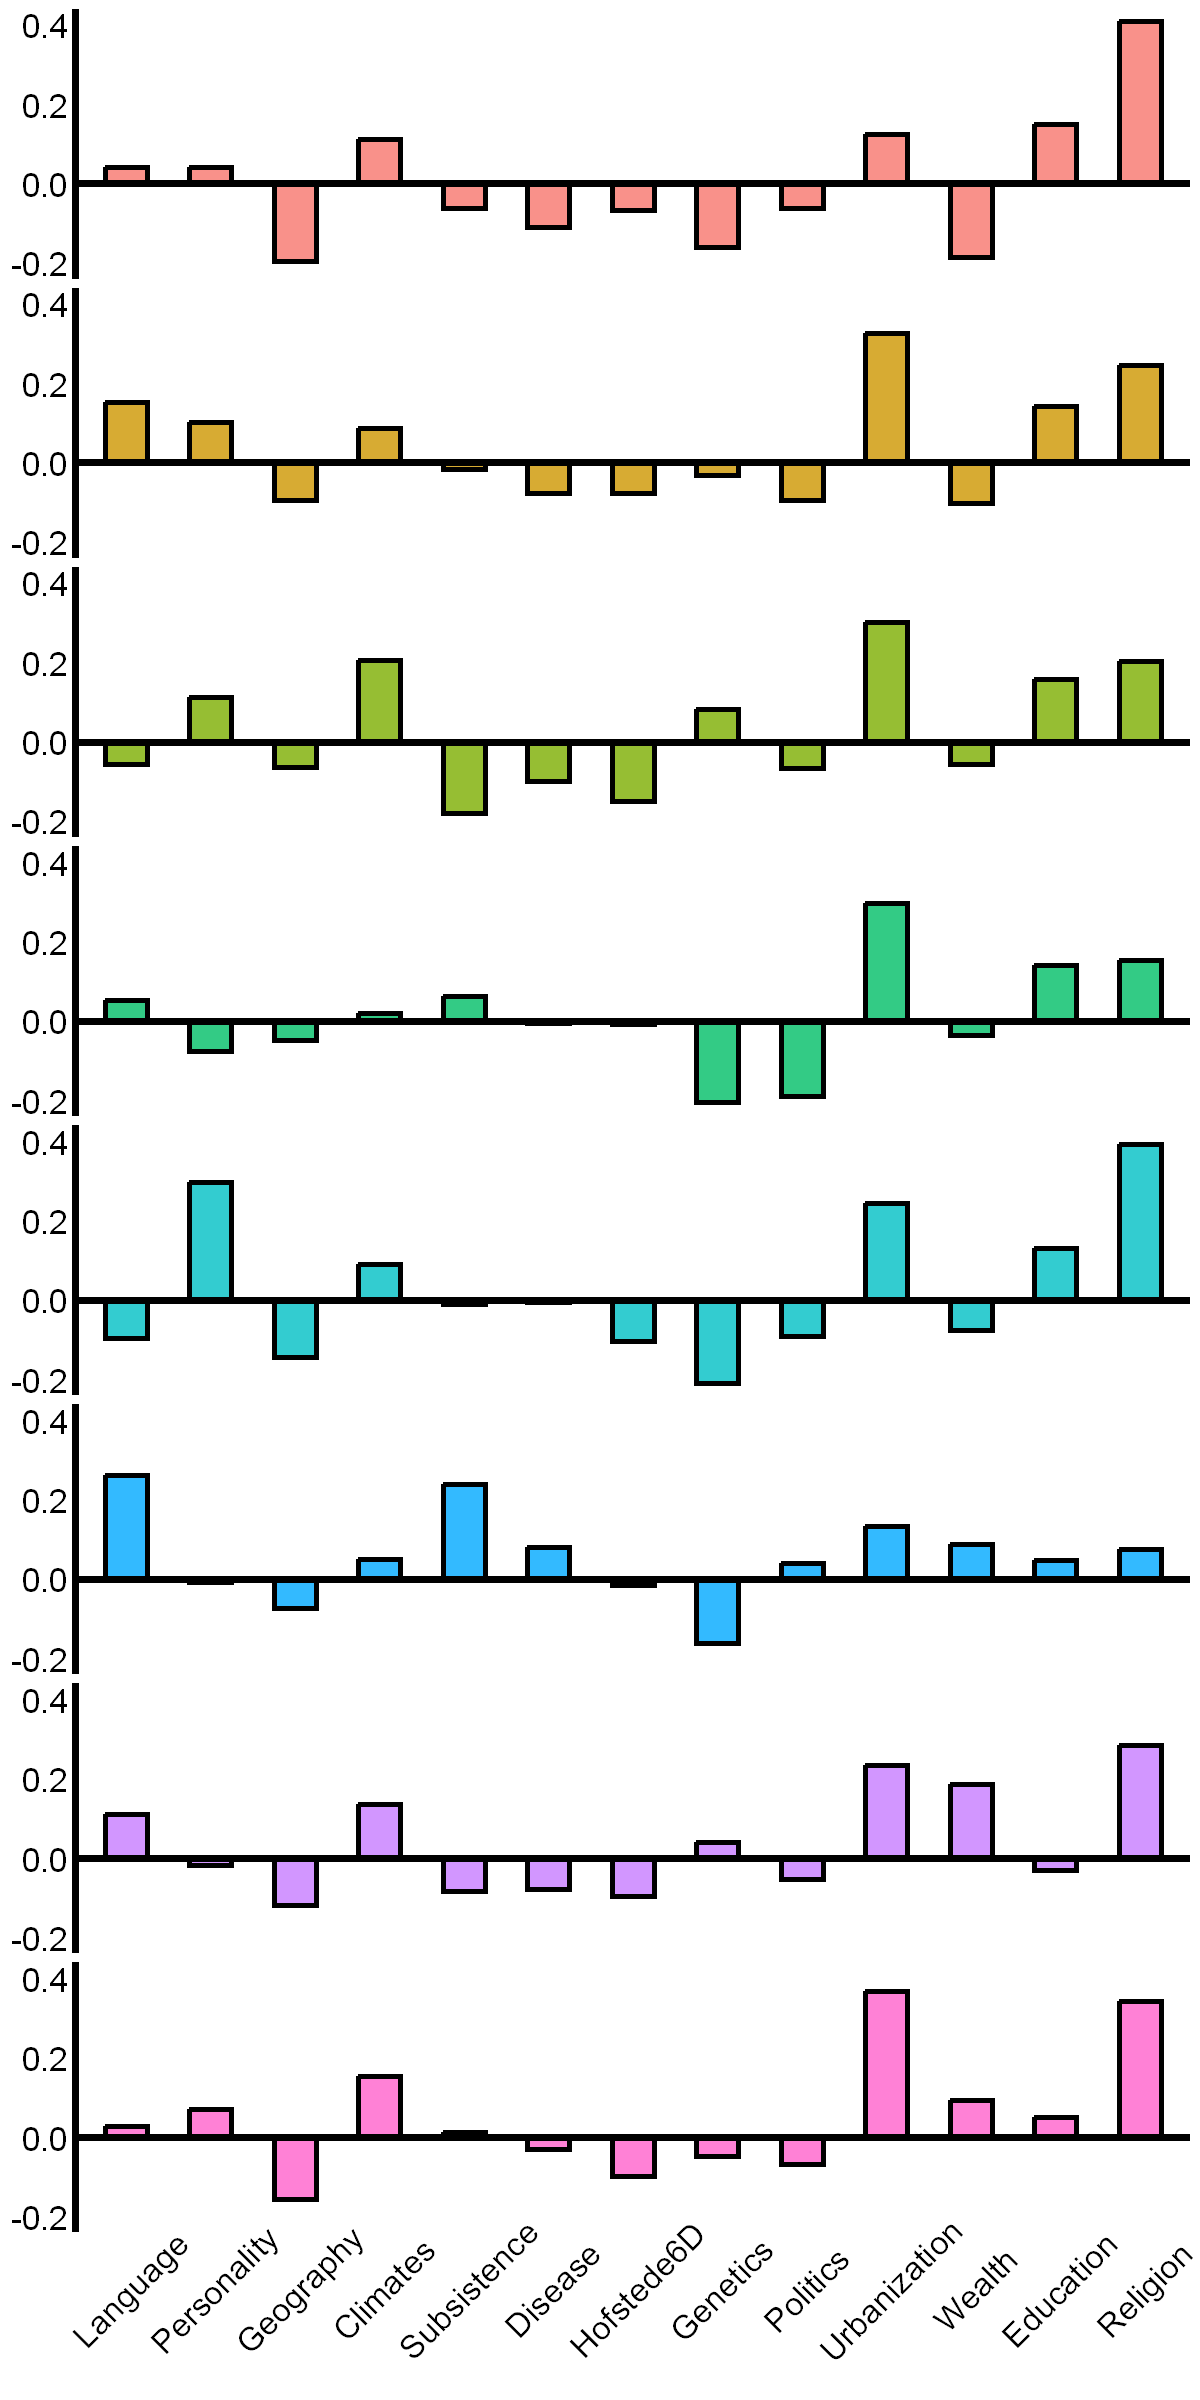

In [4]:
options(repr.plot.width=10,repr.plot.height=20)
ggplot(regression_results_melt,aes(x=predictor,y=value,fill=model))+
geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5)+
facet_grid(model ~ .) +
geom_hline(aes(yintercept=0),size=2)+
geom_vline(aes(xintercept=0),size=1.5)+
theme_classic()+
theme(#axis.text.x=element_blank(),
      #axis.text.y=element_blank(),
      axis.text.x=element_text(size=20,color='black',angle=45,vjust = 0.7),
      axis.text.y=element_text(size=20,color='black'),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      #axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=2),
      axis.line=element_blank(),
      axis.ticks = element_blank(),
      legend.position = 'none',
      strip.text = element_blank()
      )

png("../output_graph/regression/check_size/RSA_regression_subvariables.png", bg="transparent",
    family = 'sans',units='in',width=10,height=20,res=300)
ggplot(regression_results_melt,aes(x=predictor,y=value,fill=model))+
geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5)+
facet_grid(model ~ .) +
geom_hline(aes(yintercept=0),size=2)+
geom_vline(aes(xintercept=0),size=1.5)+
theme_classic()+
theme(axis.text=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
      #axis.line.x=element_line(linetype=1,color="black",size=3),
      axis.line.y=element_line(linetype=1,color="black",size=2),
      axis.line=element_blank(),
      axis.ticks = element_blank(),
      legend.position = 'none',
      strip.text = element_blank()
      )
dev.off()

In [5]:
head(regression_results_melt)

,predictor,model,value
,<fct>,<fct>,<dbl>
1,Language,activeness,0.15226075
2,Personality,activeness,0.10330174
3,Geography,activeness,-0.09372326
4,Climates,activeness,0.08753305
5,Subsistence,activeness,-0.01588348
6,Disease,activeness,-0.07670335


In [6]:
plot_regression_bar = function(model_label,mycolor){
    options(repr.plot.width=10,repr.plot.height=2.5)
    regression_results_melt %>% filter(model %in% model_label) %>%
    ggplot(aes(x=predictor,y=value))+
    geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5,fill=mycolor)+
    #facet_grid(model ~ .) +
    geom_hline(aes(yintercept=0),size=2)+
    geom_vline(aes(xintercept=0),size=1.5)+
    theme_classic()+
    theme(axis.text.x=element_blank(),
          #axis.text.y=element_blank(),
          #axis.text.x=element_text(size=20,color='black',angle=45,vjust = 0.7),
          axis.text.y=element_text(size=20,color='black'),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          #axis.line.x=element_line(linetype=1,color="black",size=3),
          axis.line.y=element_line(linetype=1,color="black",size=2),
          axis.line=element_blank(),
          axis.ticks = element_blank(),
          legend.position = 'none',
          strip.text = element_blank()
          )+
    ylim(-0.2,0.4)
}

plot_regression_bar_nolabel = function(model_label,mycolor){
    options(repr.plot.width=10,repr.plot.height=2.5)
    regression_results_melt %>% filter(model %in% model_label) %>%
    ggplot(aes(x=predictor,y=value))+
    geom_bar(stat='identity',width=0.5,alpha=0.8,color='black',size=1.5,fill=mycolor)+
    #facet_grid(model ~ .) +
    geom_hline(aes(yintercept=0),size=2)+
    geom_vline(aes(xintercept=0),size=1.5)+
    theme_classic()+
    theme(axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          #axis.text.x=element_text(size=20,color='black',angle=45,vjust = 0.7),
          #axis.text.y=element_text(size=20,color='black'),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          #axis.line.x=element_line(linetype=1,color="black",size=3),
          axis.line.y=element_line(linetype=1,color="black",size=2),
          axis.line=element_blank(),
          axis.ticks = element_blank(),
          legend.position = 'none',
          strip.text = element_blank()
          )+
    ylim(-0.2,0.4)
}

## Dimensional

png 
  2

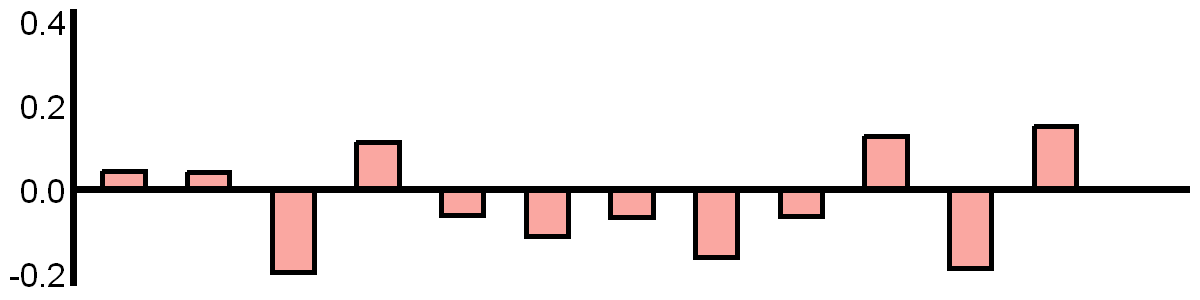

In [7]:
plot_regression_bar('formality','#F9918A')

png("../output_graph/regression/check_size/subvariables/formality.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('formality','#F9918A')
dev.off()

In [8]:
read.csv('output_data/p_value_sub/check_size/formality_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3793,0.383,0.9204,0.2518,0.6774,0.9006,0.2257,0.9489,0.1448,0.6552,0.7645,0.0029,0.6816,0.5632,0.0883


png 
  2

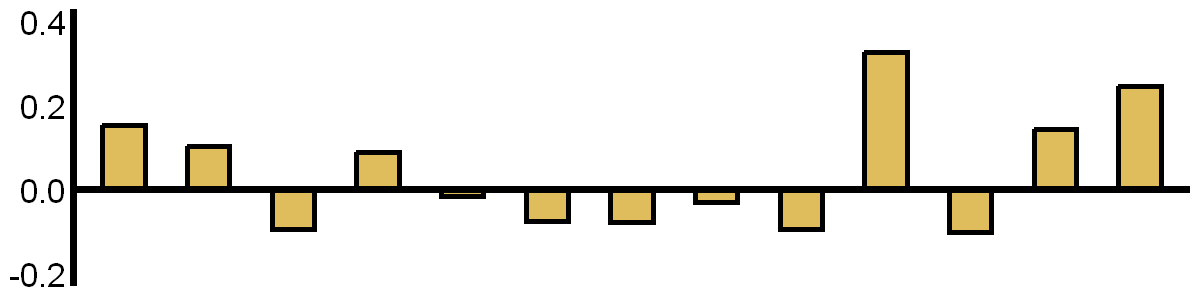

In [9]:
plot_regression_bar('activeness','#D7AB33')

png("../output_graph/regression/check_size/subvariables/activeness.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('activeness','#D7AB33')
dev.off()

In [10]:
read.csv('output_data/p_value_sub/check_size/activeness_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1271,0.2644,0.7492,0.2933,0.5307,0.8111,0.0248,0.7922,0.1345,0.6954,0.5389,0.0503,0.787,0.4214,0.562


png 
  2

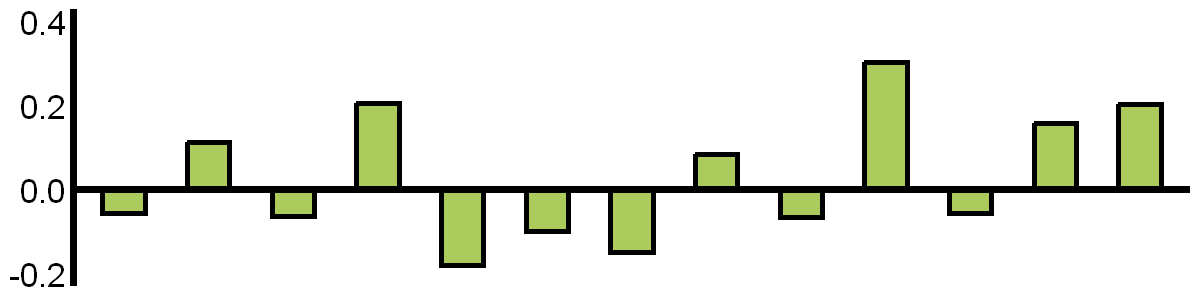

In [11]:
plot_regression_bar('valence','#96BE33')

png("../output_graph/regression/check_size/subvariables/valence.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('valence','#96BE33')
dev.off()

In [12]:
read.csv('output_data/p_value_sub/check_size/valence_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.6552,0.2576,0.6437,0.1572,0.9088,0.8814,0.0534,0.6442,0.1435,0.8216,0.3257,0.1014,0.6822,0.1888,0.5507


png 
  2

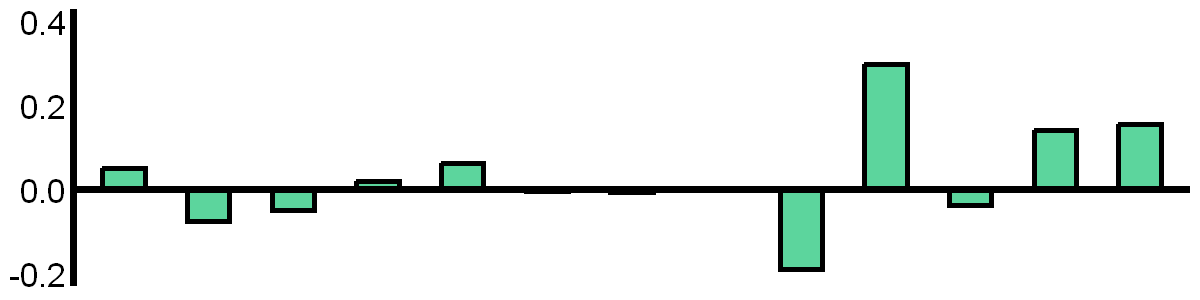

In [13]:
plot_regression_bar('exchange','#33CB85')

png("../output_graph/regression/check_size/subvariables/exchange.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('exchange','#33CB85')
dev.off()

In [14]:
read.csv('output_data/p_value_sub/check_size/exchange_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3536,0.6247,0.6073,0.3821,0.3111,0.5076,0.0519,0.5904,0.1643,0.5174,0.8285,0.1625,0.9447,0.3955,0.6915


png 
  2

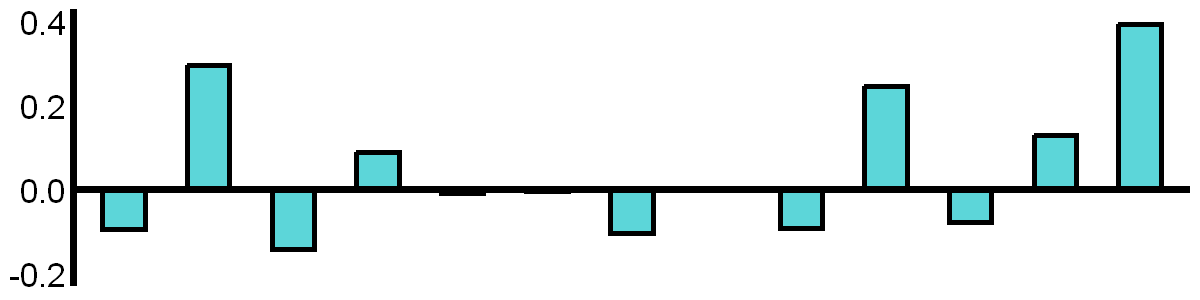

In [15]:
plot_regression_bar('equality','#33CCD0')

png("../output_graph/regression/check_size/subvariables/equality.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('equality','#33CCD0')
dev.off()

In [16]:
read.csv('output_data/p_value_sub/check_size/equality_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7574,0.0552,0.836,0.2911,0.5063,0.5103,0.0825,0.7169,0.1744,0.7328,0.8301,0.0069,0.763,0.2105,0.2319


## Categorical

png 
  2

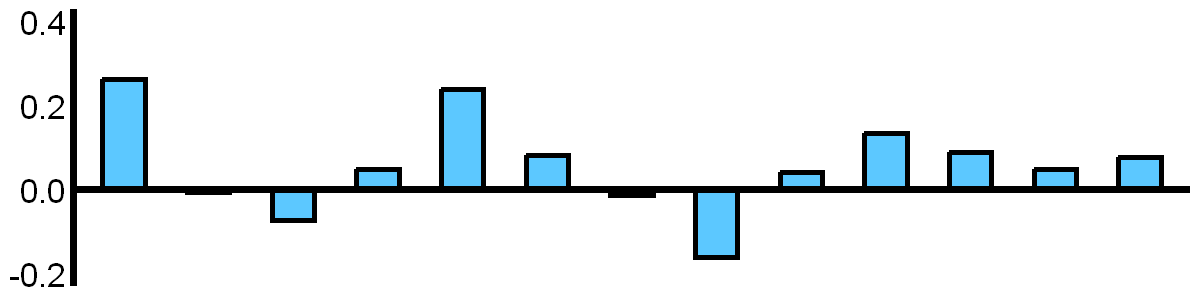

In [17]:
plot_regression_bar('hostile','#33BAFF')

png("../output_graph/regression/check_size/subvariables/hostile.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('hostile','#33BAFF')
dev.off()

In [18]:
read.csv('output_data/p_value_sub/check_size/hostile_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0129,0.4951,0.7436,0.3045,0.0218,0.1577,0.122,0.1732,0.2947,0.5395,0.8976,0.2691,0.3219,0.9466,0.9757


png 
  2

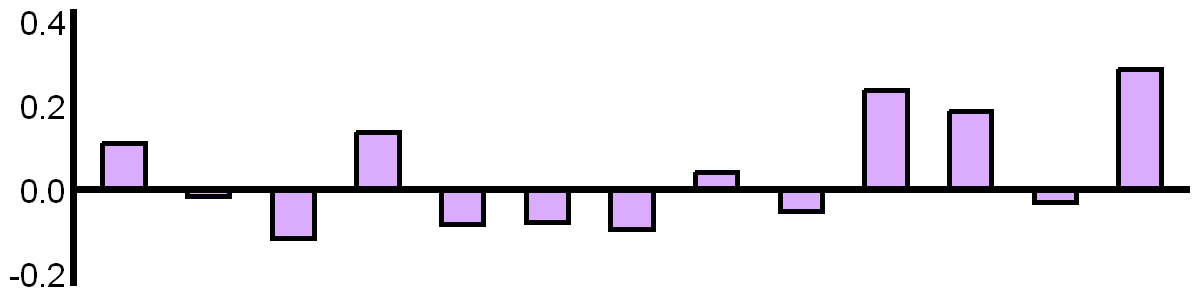

In [19]:
plot_regression_bar('private','#D296FF')

png("../output_graph/regression/check_size/subvariables/private.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('private','#D296FF')
dev.off()

In [20]:
read.csv('output_data/p_value_sub/check_size/private_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1805,0.5072,0.8131,0.1719,0.7484,0.8122,0.0628,0.0538,0.5595,0.7534,0.3789,0.0238,0.6678,0.9936,0.6719


png 
  2

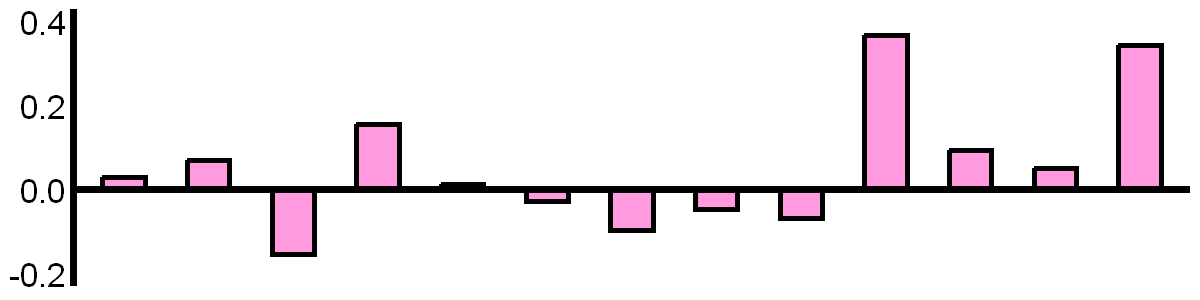

In [21]:
plot_regression_bar('public','#FF81D6')

png("../output_graph/regression/check_size/subvariables/public.png", bg="transparent",
    family = 'sans',units='in',width=10,height=2.5,res=300)
plot_regression_bar_nolabel('public','#FF81D6')
dev.off()

In [22]:
read.csv('output_data/p_value_sub/check_size/public_33d.csv',row.names=1)

,Lexical,personality_all,Coordinate,Climatic_demands,subsistence,disease,urban,wealth,edu,Hofstede_6D,new_gendist_weighted,religion_per,idealogy,demographics,check_size
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4047,0.2837,0.8627,0.1524,0.4522,0.6264,0.0289,0.22,0.3167,0.7196,0.5418,0.0095,0.691,0.9701,0.6257
